# Import Dependencies

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LinearRegression

# Reading the advertising.csv 

In [2]:
advertising = pd.read_csv("advertising.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Exploratory Data Analysis

In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [8]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Univariant Analysis

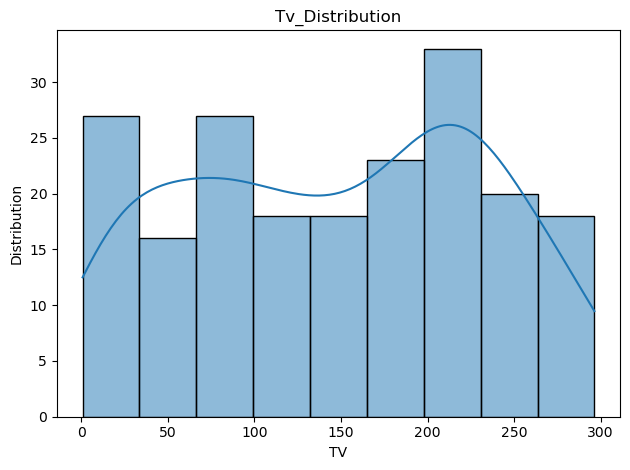

In [9]:
#plt.figure(figsize=(10,6))
sns.histplot(data= advertising,x="TV",kde = True)
plt.xlabel("TV")
plt.ylabel("Distribution")
plt.title("Tv_Distribution")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Radio', ylabel='Count'>

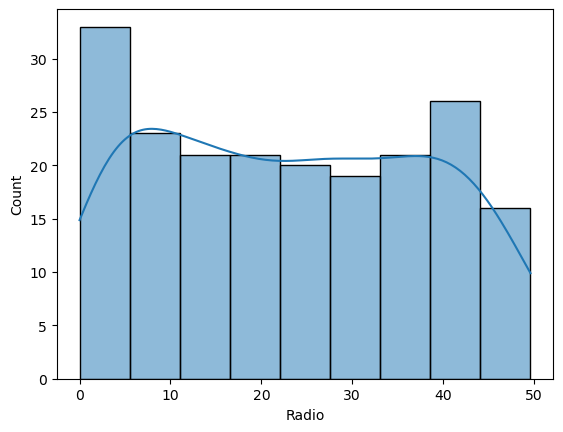

In [10]:
sns.histplot(advertising["Radio"],kde=True)

<AxesSubplot:xlabel='Newspaper'>

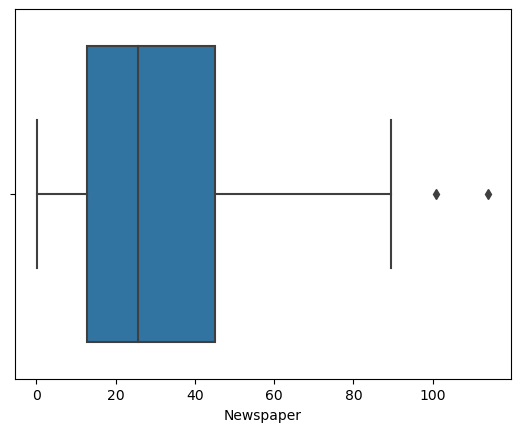

In [11]:
sns.boxplot(advertising["Newspaper"])

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

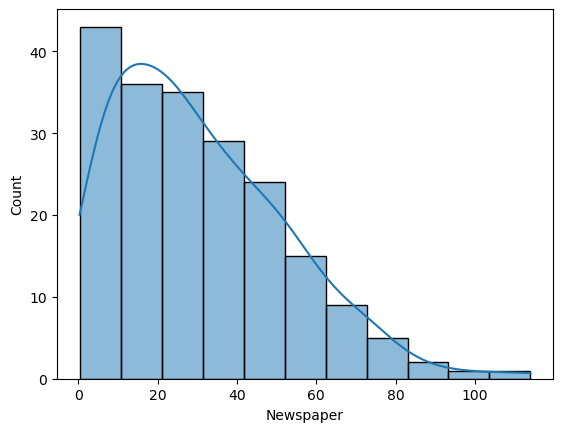

In [12]:
sns.histplot(advertising["Newspaper"],kde=True)

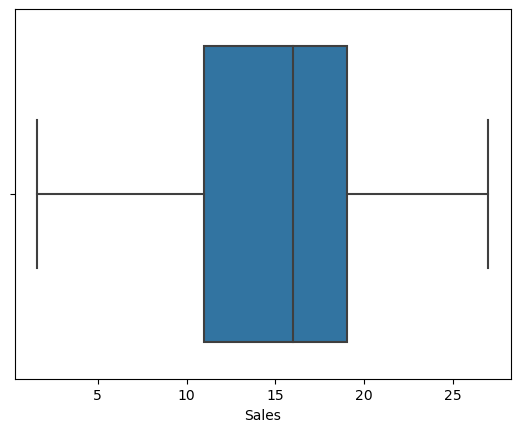

In [13]:
sns.boxplot(advertising["Sales"])
plt.show()

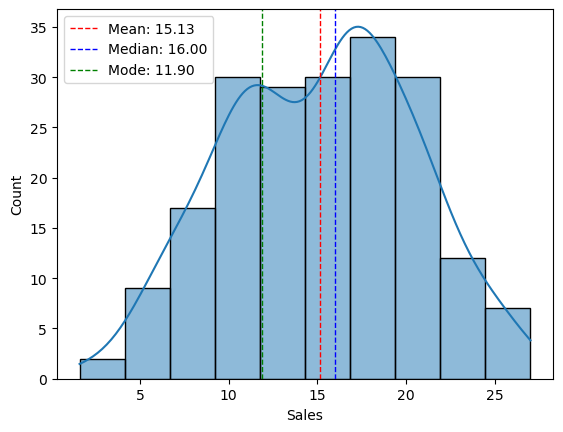

In [14]:
import statistics
sns.histplot(data = advertising, x= "Sales",kde=True)
# Calculate the mean and median
mean_value = advertising["Sales"].mean()
median_value = advertising["Sales"].median()
mode_value = statistics.mode(advertising["Sales"])

# Add annotations to the plot
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')

# Add a legend
plt.legend()

plt.show()

# Bivariant Analysis

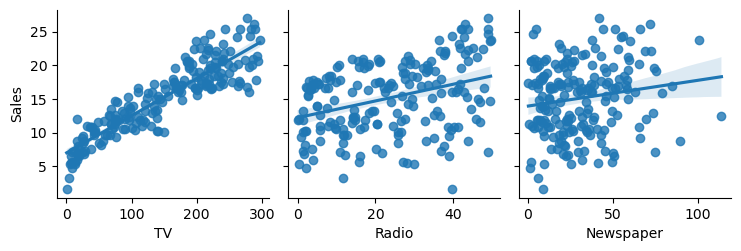

In [15]:
sns.pairplot(data = advertising, x_vars =["TV","Radio","Newspaper"], y_vars = "Sales", kind= "reg")

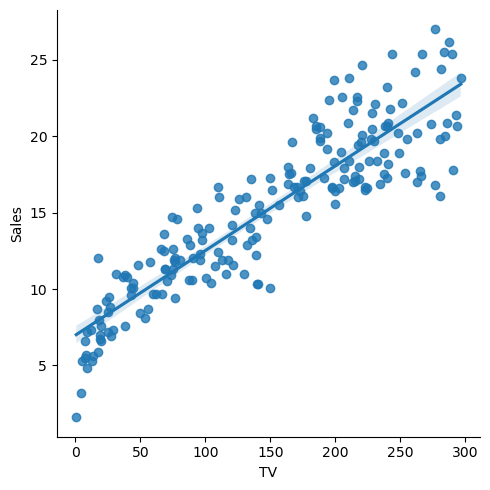

In [16]:
sns.lmplot(data = advertising, x= "TV", y = "Sales")

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

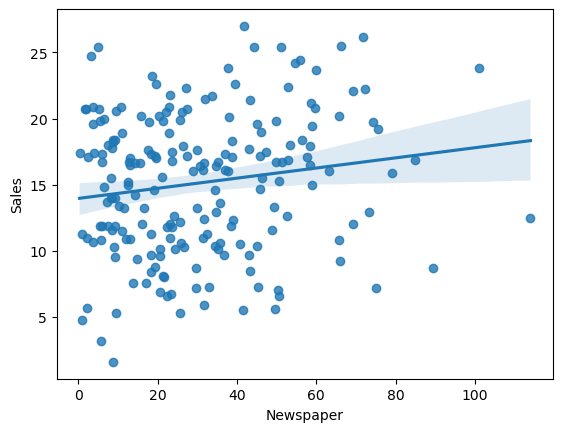

In [17]:
sns.regplot(data = advertising, x= "Newspaper", y = "Sales")

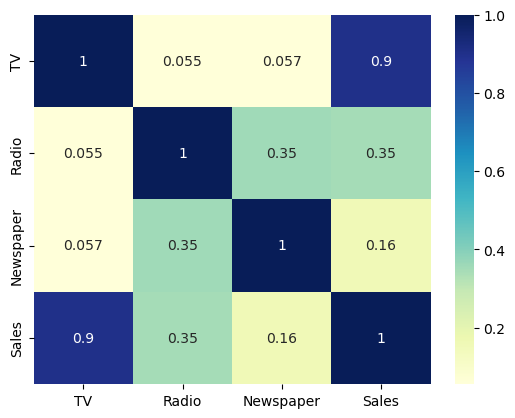

In [18]:
# Let's see the correlation between different variables
sns.heatmap(advertising.corr(),cmap="YlGnBu",annot=True)
plt.show()

# Sepearting features and target

In [19]:
X = advertising.drop("Sales",axis=1)
Y = advertising["Sales"]

In [20]:
print(X.shape,Y.shape)

(200, 3) (200,)


# Train_Test_Split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [22]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(160, 3) (40, 3) (160,) (40,)


# Model Training
# Linear Regression

In [23]:
model_lr = LinearRegression()

In [24]:
model_lr.fit(X_train,Y_train)

LinearRegression()

In [25]:
train_preds = model_lr.predict(X_train)

In [26]:
test_preds = model_lr.predict(X_test)

# Error Distribution

In [27]:
residual_train = Y_train - train_preds
residual_train

79    -0.914658
197   -0.528814
38     0.189067
24     0.238674
122   -0.634124
         ...   
106   -0.116056
14    -0.360057
92    -0.818326
179    2.773360
102   -1.299976
Name: Sales, Length: 160, dtype: float64

In [28]:
residual_test = Y_test - test_preds
residual_test

95    -0.134772
15     1.990260
30    -2.323989
158   -1.972785
128    3.017281
115    0.030598
69     1.218805
170   -0.290350
174   -0.737013
45    -0.566575
66     2.076035
182    0.218266
165   -1.307512
78    -2.767507
186   -2.345510
177    1.768372
56    -2.628146
152   -1.298766
82     0.291194
68    -1.578328
124   -1.106318
16    -0.098833
148   -0.005183
93    -0.188548
65     1.882039
60     0.174933
84     0.860915
67    -0.415209
125   -0.170809
132   -2.226825
9     -0.359474
18     0.665091
55     2.897080
75    -1.734342
150   -5.478475
104   -0.483645
135   -0.528218
137   -2.009533
164   -0.709928
76     0.435587
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Density'>

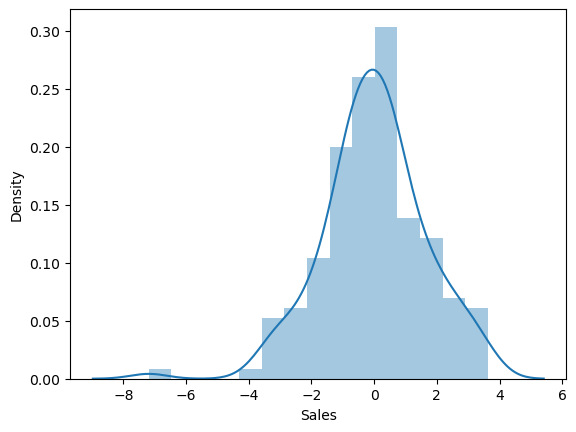

In [29]:
sns.distplot(residual_train, bins=15,kde=True)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

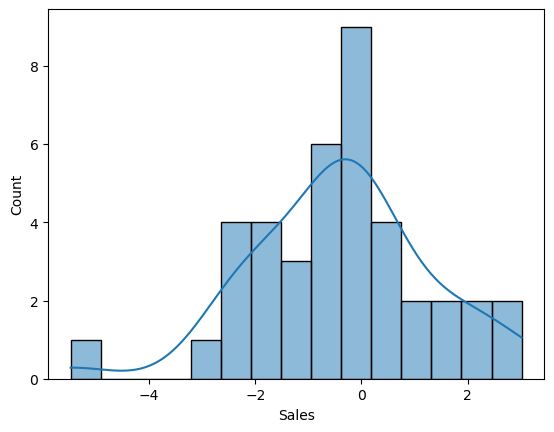

In [30]:
sns.histplot(residual_test, bins = 15, edgecolor="k",kde=True)

# Model Evaluation

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [32]:
R_squared_train = r2_score(Y_train,train_preds)
R_squared_train

0.9001416005862131

In [33]:
R_squared_test = r2_score(Y_test,test_preds)
R_squared_test

0.9059011844150826

In [34]:
MSE_train = mean_squared_error(Y_train,train_preds)
MSE_train

2.676142653782669

In [35]:
MSE_test = mean_squared_error(Y_test,test_preds)
MSE_test

2.9077569102710905

In [36]:
import math
rmse_train = np.sqrt(mean_squared_error(Y_train,train_preds))
rmse_train

1.635892005537856

In [37]:
rmse_test = np.sqrt(mean_squared_error(Y_test,test_preds))
rmse_test

1.7052146229349228

In [38]:
mae_train = mean_absolute_error(Y_train,train_preds)
mae_train

1.2344160869575869

In [39]:
mae_test = mean_absolute_error(Y_test,test_preds)
mae_test

1.2748262109549338

In [40]:
# Calculate Adjusted R-squared
n_train = len(X_train)  # Number of data points
p = X_train.shape[1]  # Number of independent variables
adj_r2_train = 1 - (1 - R_squared_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_train

0.8982212467513325

In [41]:
n_test = len(X_test)  # Number of data points
p = X_test.shape[1]  # Number of independent variables
adj_r2_test = 1 - (1 - R_squared_test) * (n_test - 1) / (n_test - p - 1)
adj_r2_test

0.8980596164496728

<AxesSubplot:xlabel='Sales'>

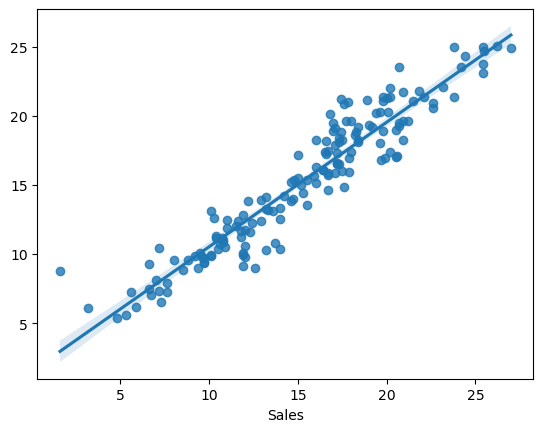

In [42]:
sns.regplot(Y_train,train_preds)

<AxesSubplot:xlabel='Sales'>

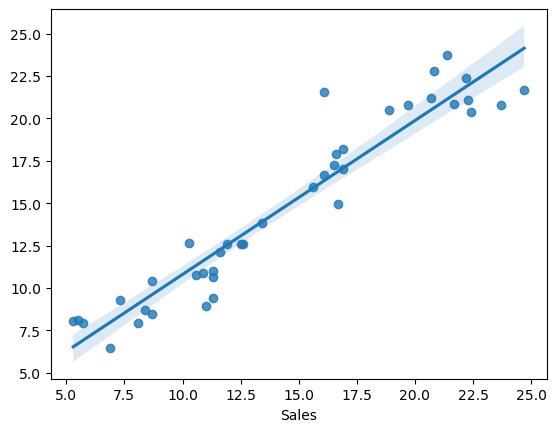

In [43]:
sns.regplot(Y_test,test_preds)

# Residual Analysis

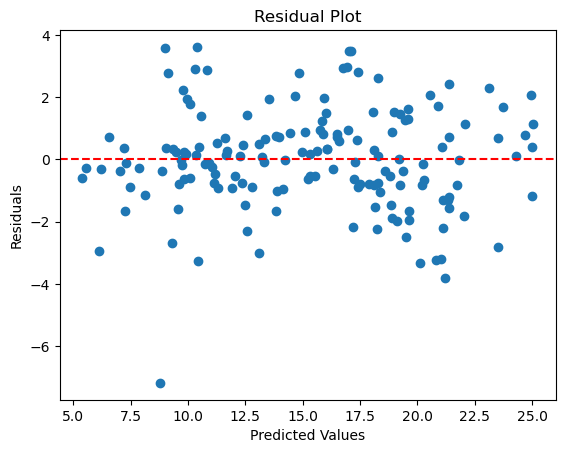

In [44]:
# Residual plot analysis (visualization, not numerical)

plt.scatter(train_preds, residual_train)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

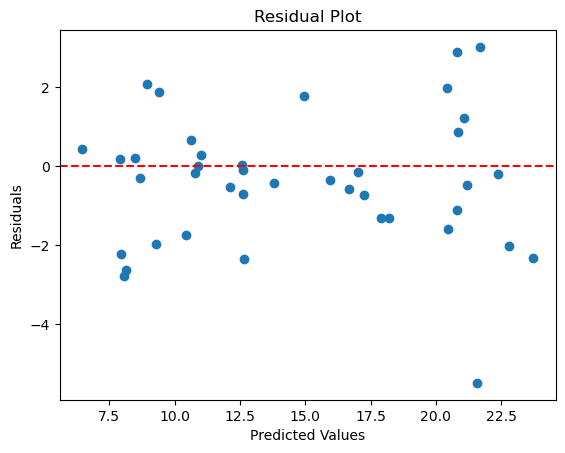

In [45]:
plt.scatter(test_preds, residual_test)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# DecisionTreeRegressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
model_dec = DecisionTreeRegressor()
model_dec.fit(X_train,Y_train)
X_preds_dec = model_dec.predict(X_train)
Y_preds_dec = model_dec.predict(X_test)

In [49]:
r2_train_dec = r2_score(Y_train,X_preds_dec)
r2_train_dec

1.0

In [50]:
r2_test_dec = r2_score(Y_test,Y_preds_dec)
r2_test_dec

0.9121228694124157

In [51]:
MSE_dec_train = mean_squared_error(Y_train,X_preds_dec)
MSE_dec_train

0.0

In [52]:
MSE_dec_test = mean_squared_error(Y_test,Y_preds_dec)
MSE_dec_test

2.7155

In [54]:
rmse_dec_train = np.sqrt(mean_squared_error(Y_train,X_preds_dec))
rmse_dec_train

0.0

In [55]:
rmse_dec_test = np.sqrt(mean_squared_error(Y_test,Y_preds_dec))
rmse_dec_test

1.6478774226258457

In [56]:
mae_dec_train = mean_absolute_error(Y_train,X_preds_dec)
mae_dec_train

0.0

In [57]:
mae_dec_test = mean_absolute_error(Y_test,Y_preds_dec)
mae_dec_test

1.17